<a href="https://colab.research.google.com/github/vanajathiruchselvam/CMP7005_China_Air_Pollution_EDA/blob/main/EDA_Analysis_China_Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Mounting the google drive to the colab environment:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import missingno as msno

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Programming for Data Analysis/Practical_Assignment_Final/Assessment_data'

/content/drive/MyDrive/Programming for Data Analysis/Practical_Assignment_Final/Assessment_data


In [4]:
%ls

combined_dataset_china_air_pollution.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv


In [5]:
import pandas as pd
import glob

# Get all CSV files in the folder
csv_files = glob.glob("/content/drive/MyDrive/Programming for Data Analysis/Practical_Assignment_Final/Assessment_data/*.csv")

# Read and combine all CSV files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save to a new CSV file
combined_df.to_csv("combined_dataset_china_air_pollution.csv", index=False)

print("All CSV files have been merged into 'combined_dataset_china_air_pollution.csv'.")


All CSV files have been merged into 'combined_dataset_china_air_pollution.csv'.


In [6]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("combined_dataset_china_air_pollution.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [7]:
df.shape

(701280, 18)

In [8]:
#shows columns in list formatting
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701280 entries, 0 to 701279
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       701280 non-null  int64  
 1   year     701280 non-null  int64  
 2   month    701280 non-null  int64  
 3   day      701280 non-null  int64  
 4   hour     701280 non-null  int64  
 5   PM2.5    686600 non-null  float64
 6   PM10     690915 non-null  float64
 7   SO2      686550 non-null  float64
 8   NO2      681530 non-null  float64
 9   CO       665535 non-null  float64
 10  O3       679370 non-null  float64
 11  TEMP     700560 non-null  float64
 12  PRES     700575 non-null  float64
 13  DEWP     700545 non-null  float64
 14  RAIN     700570 non-null  float64
 15  wd       697370 non-null  object 
 16  WSPM     700705 non-null  float64
 17  station  701280 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 96.3+ MB


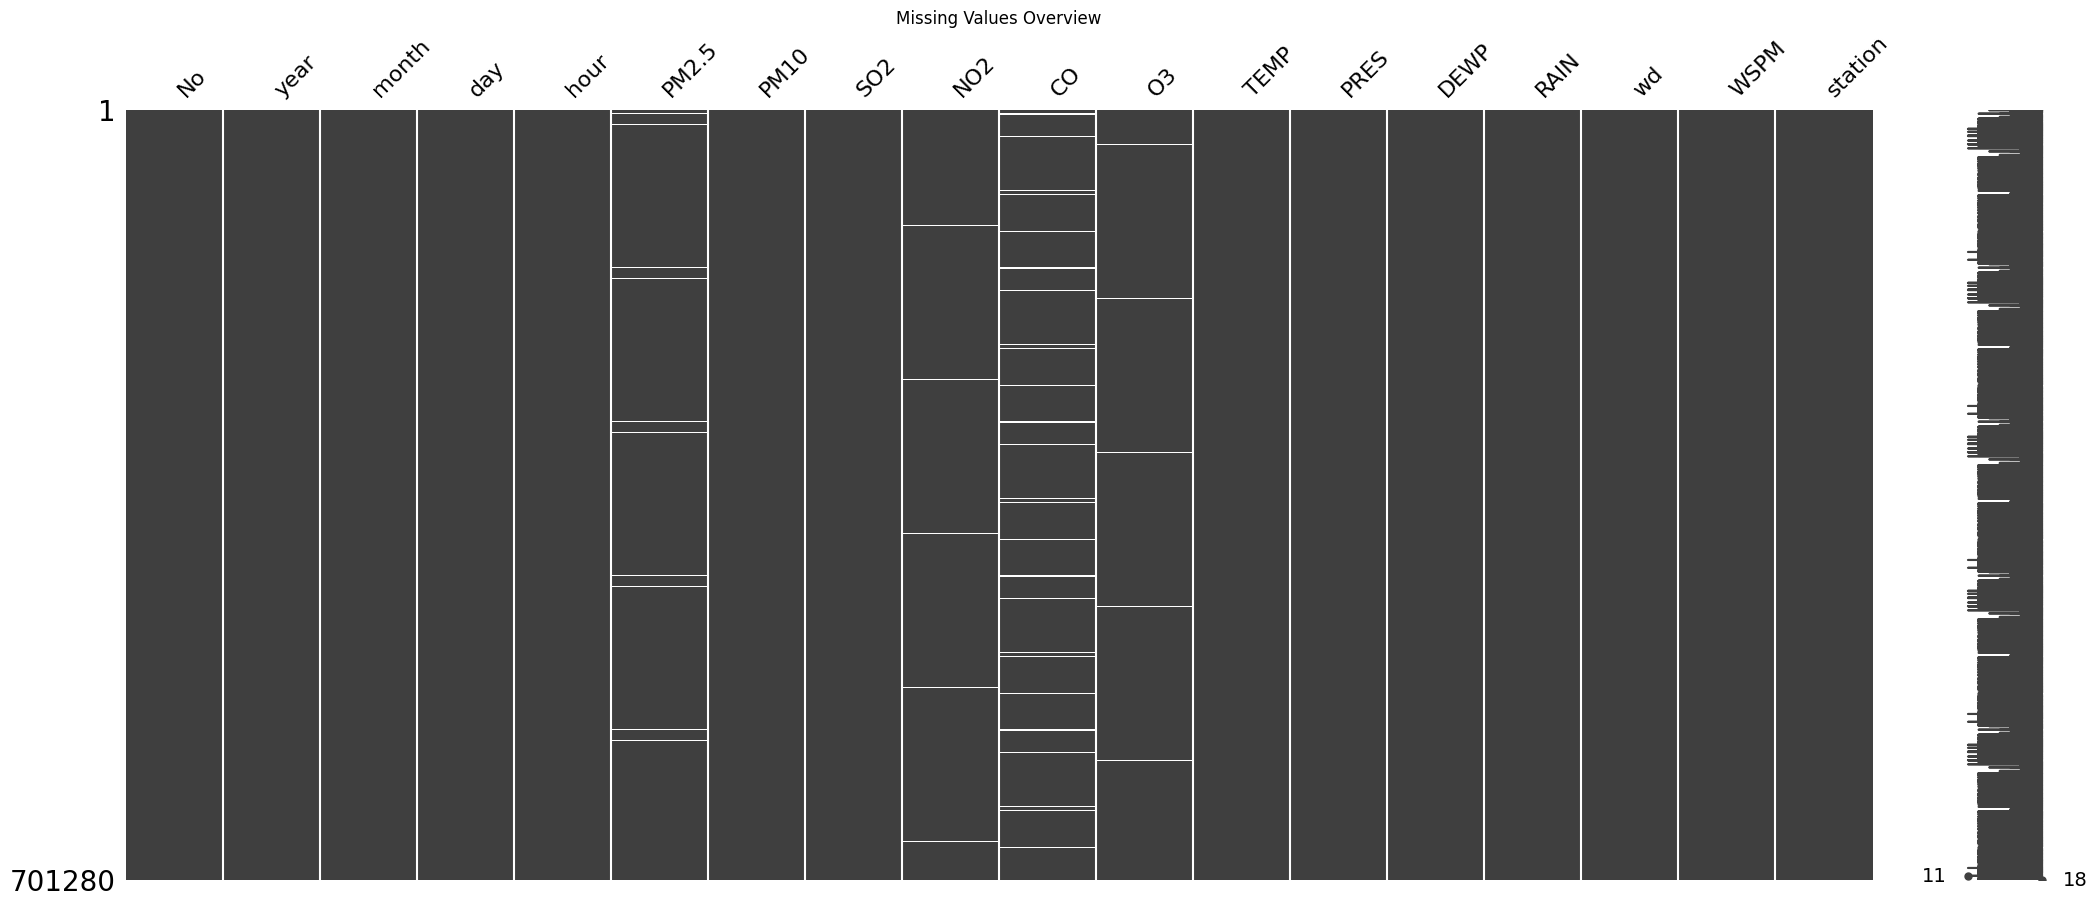

In [10]:
import missingno as msno
msno.matrix(df)
plt.title('Missing Values Overview')
plt.show()

In [11]:
print(df['station'].value_counts())


station
Shunyi          175320
Nongzhanguan    175320
Guanyuan        175320
Dingling        175320
Name: count, dtype: int64


In [17]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table.columns = ['Missing Values', '% of Total Values']

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    # Return styled DataFrame
    return mis_val_table.style.background_gradient(cmap='Greens')


In [18]:
missing_values_table(df)


,Missing Values,% of Total Values
CO,35745,5.097108
O3,21910,3.124287
NO2,19750,2.816279
SO2,14730,2.100445
PM10,10365,1.478012
wd,3910,0.557552
DEWP,735,0.104808
TEMP,720,0.102669
RAIN,710,0.101243
PRES,705,0.100530


In [19]:
# Fill missing PM2.5 with median
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)

In [22]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)


In [23]:
print(df.index)

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=701280, freq=None)


In [25]:
df['wd'].fillna(df['wd'].mode()[0], inplace=True)


In [26]:
numerical_cols = ['CO', 'O3', 'NO2', 'SO2', 'PM10', 'DEWP', 'TEMP', 'RAIN', 'PRES', 'WSPM']

# Fill missing values with median per station
for col in numerical_cols:
    df[col] = df.groupby('station')[col].transform(lambda x: x.fillna(x.median()))


In [27]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [28]:
missing_values_table(df)


,Missing Values,% of Total Values
No,0,0.000000
year,0,0.000000
month,0,0.000000
day,0,0.000000
hour,0,0.000000
PM2.5,0,0.000000
PM10,0,0.000000
SO2,0,0.000000
NO2,0,0.000000
CO,0,0.000000


In [29]:
#converting the wind direction to numerical categories
df['wd'] = df['wd'].astype('category').cat.codes


In [30]:
#added a season column based on the month

def get_season(month):
    if month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    elif month in [9, 10, 11]: return 'Autumn'
    else: return 'Winter'

df['season'] = df['month'].apply(get_season)


In [35]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season
datetime,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,7,9.3,Shunyi,Spring
2013-03-01 01:00:00,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,7,9.4,Shunyi,Spring
2013-03-01 02:00:00,3,2013,3,1,2,14.0,14.0,5.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,7,8.6,Shunyi,Spring
2013-03-01 03:00:00,4,2013,3,1,3,12.0,12.0,3.0,5.0,800.0,43.0,-2.1,1027.3,-23.3,0.0,7,6.6,Shunyi,Spring
2013-03-01 04:00:00,5,2013,3,1,4,12.0,12.0,3.0,37.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,7,4.5,Shunyi,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,5,1.3,Dingling,Winter
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,3,2.1,Dingling,Winter
2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,3,1.5,Dingling,Winter


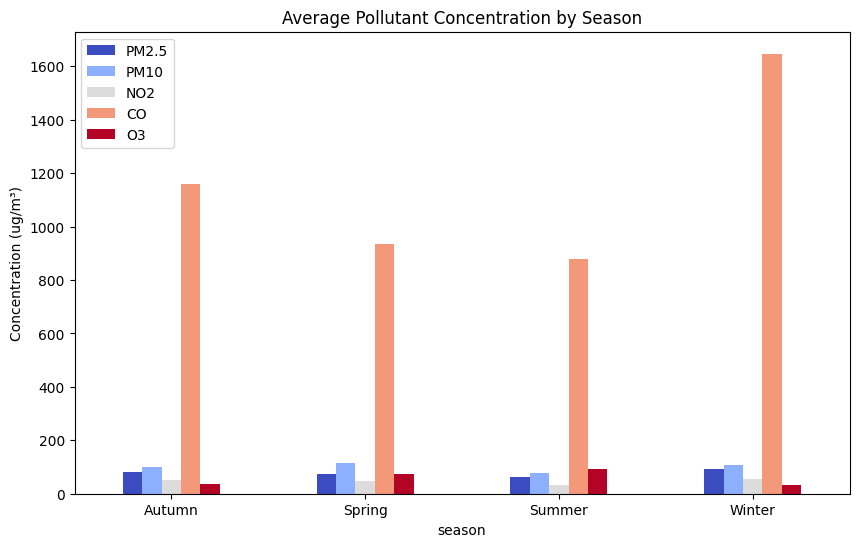

In [36]:
seasonal_avg = df.groupby(['season'])[['PM2.5', 'PM10', 'NO2', 'CO', 'O3']].mean()

seasonal_avg.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title('Average Pollutant Concentration by Season')
plt.ylabel('Concentration (ug/m³)')
plt.xticks(rotation=0)
plt.show()


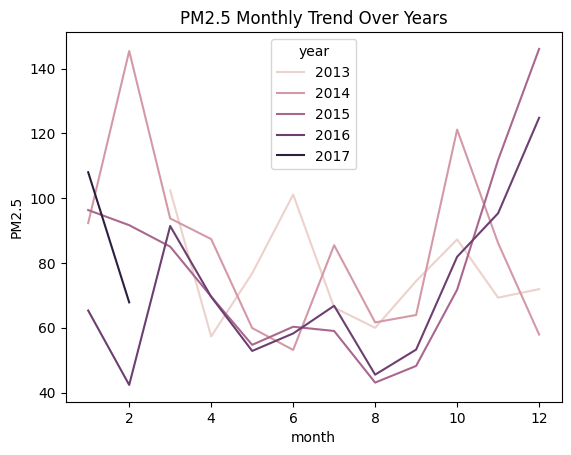

In [37]:
monthly_trend = df.groupby(['year', 'month'])[['PM2.5', 'NO2', 'O3']].mean().reset_index()
sns.lineplot(data=monthly_trend, x='month', y='PM2.5', hue='year')
plt.title('PM2.5 Monthly Trend Over Years')
plt.show()


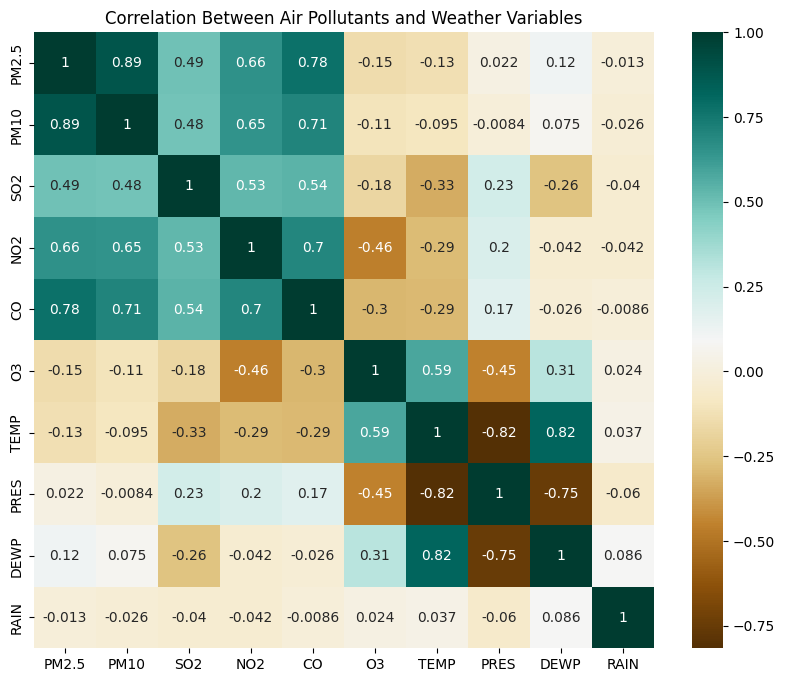

In [38]:
corr = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='BrBG')
plt.title('Correlation Between Air Pollutants and Weather Variables')
plt.show()


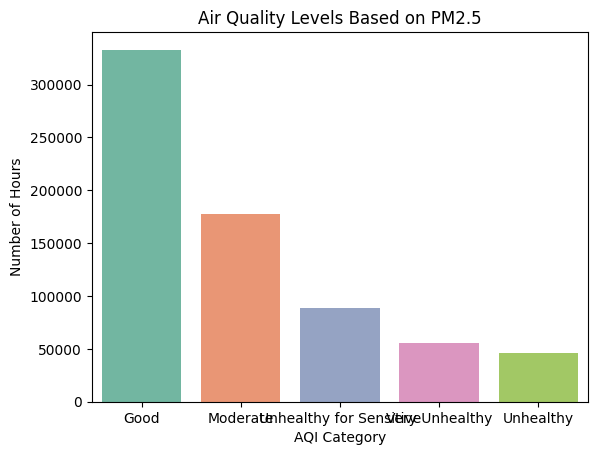

In [39]:
def pm25_aqi_level(value):
    if value <= 50: return 'Good'
    elif value <= 100: return 'Moderate'
    elif value <= 150: return 'Unhealthy for Sensitive'
    elif value <= 200: return 'Unhealthy'
    else: return 'Very Unhealthy'

df['AQI_PM2.5'] = df['PM2.5'].apply(pm25_aqi_level)
aqi_counts = df['AQI_PM2.5'].value_counts()

sns.barplot(x=aqi_counts.index, y=aqi_counts.values, palette='Set2')
plt.title('Air Quality Levels Based on PM2.5')
plt.ylabel('Number of Hours')
plt.xlabel('AQI Category')
plt.show()


In [41]:
worst_pm = df.groupby('station')['PM2.5'].mean().sort_values(ascending=False).head(5)
print(" Worst Stations according to the PM2.5:\n", worst_pm)


 Worst Stations according to the PM2.5:
 station
Nongzhanguan    84.268252
Guanyuan        82.407506
Shunyi          78.801811
Dingling        65.700915
Name: PM2.5, dtype: float64


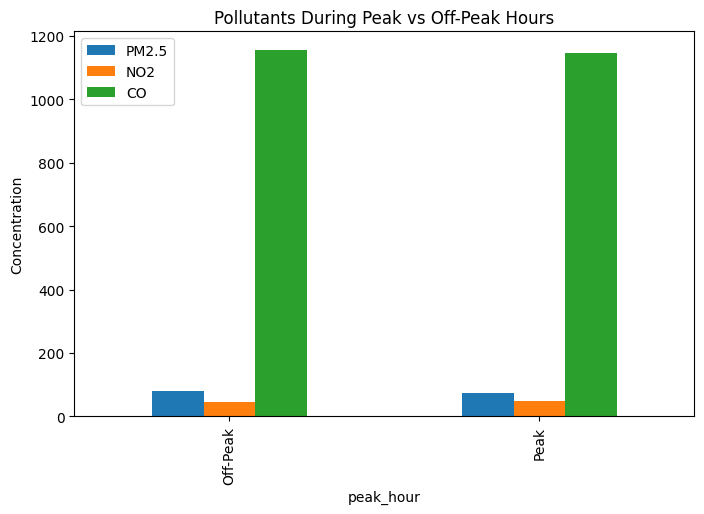

In [42]:
df['peak_hour'] = df['hour'].apply(lambda x: 'Peak' if x in range(7,11) or x in range(17,21) else 'Off-Peak')
peak_pollution = df.groupby('peak_hour')[['PM2.5', 'NO2', 'CO']].mean()
peak_pollution.plot(kind='bar', figsize=(8,5), title="Pollutants During Peak vs Off-Peak Hours")
plt.ylabel("Concentration")
plt.show()


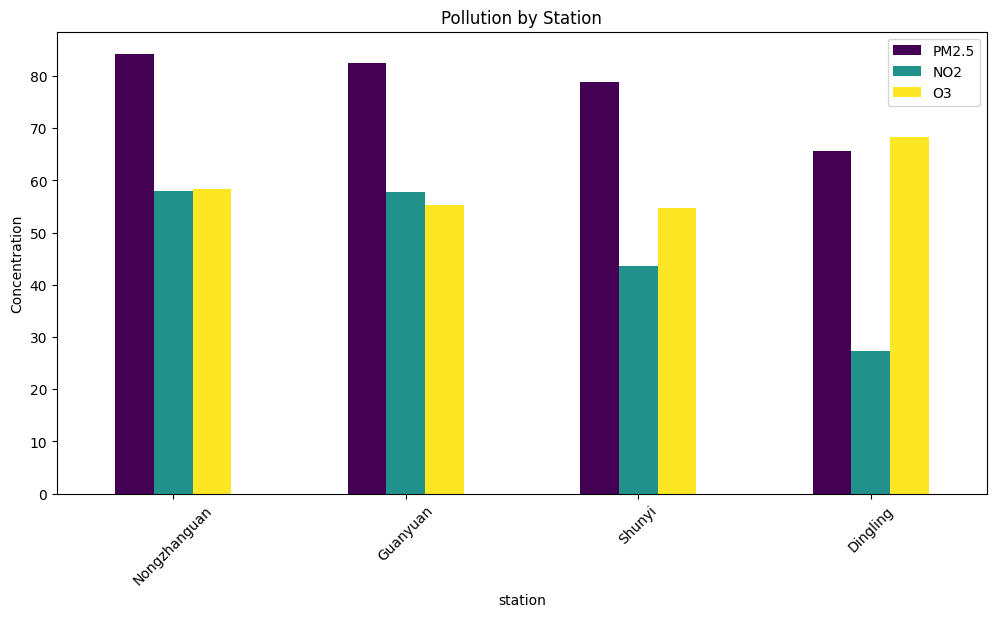

In [43]:
station_pollution = df.groupby('station')[['PM2.5', 'NO2', 'O3']].mean().sort_values(by='PM2.5', ascending=False)
station_pollution.plot(kind='bar', figsize=(12,6), colormap='viridis')
plt.title('Pollution by Station')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.show()


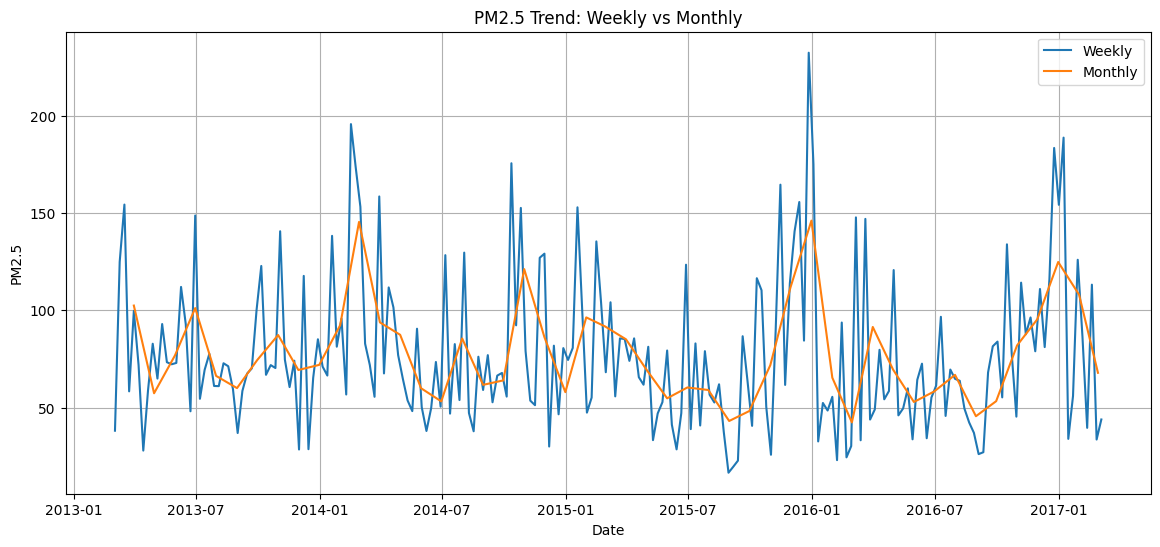

In [45]:
# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Select only numeric columns for resampling
numeric_df = df.select_dtypes(include='number')

# Resample only numeric data
weekly_avg = numeric_df.resample('W').mean()
monthly_avg = numeric_df.resample('M').mean()

# Plot PM2.5 trend
plt.figure(figsize=(14,6))
plt.plot(weekly_avg['PM2.5'], label='Weekly')
plt.plot(monthly_avg['PM2.5'], label='Monthly')
plt.title('PM2.5 Trend: Weekly vs Monthly')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.show()



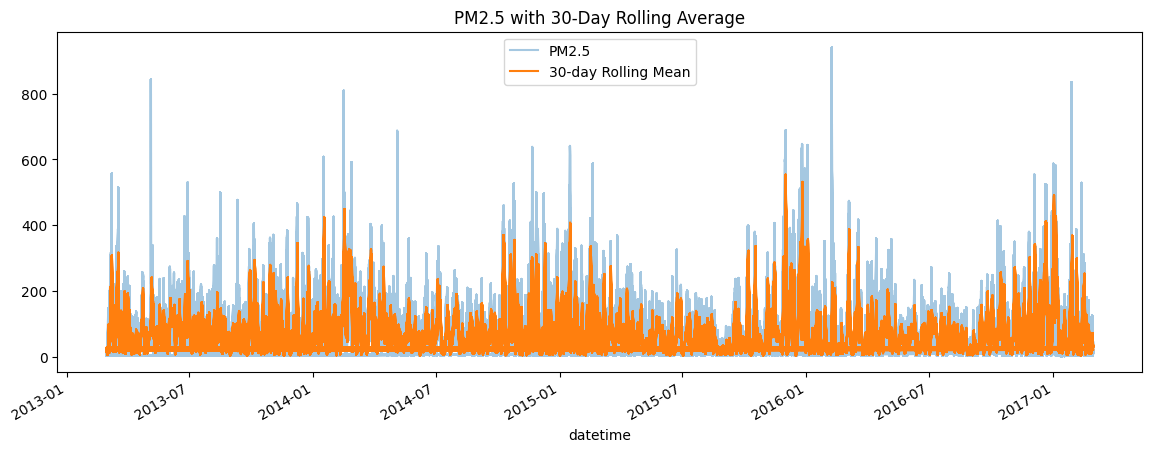

In [46]:
df['PM2.5_Rolling'] = df['PM2.5'].rolling(window=30).mean()
df['PM2.5'].plot(figsize=(14,5), alpha=0.4, label='PM2.5')
df['PM2.5_Rolling'].plot(label='30-day Rolling Mean')
plt.legend()
plt.title('PM2.5 with 30-Day Rolling Average')
plt.show()


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='No', y='season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

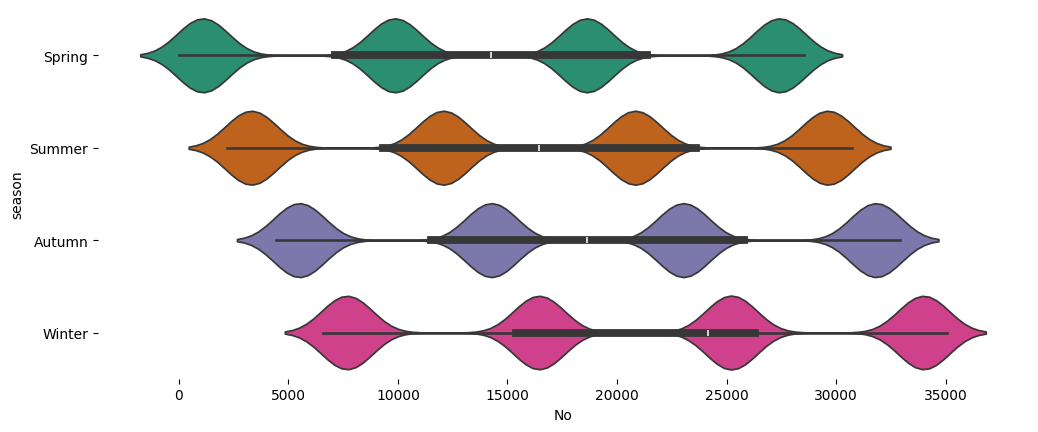

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='No', y='season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

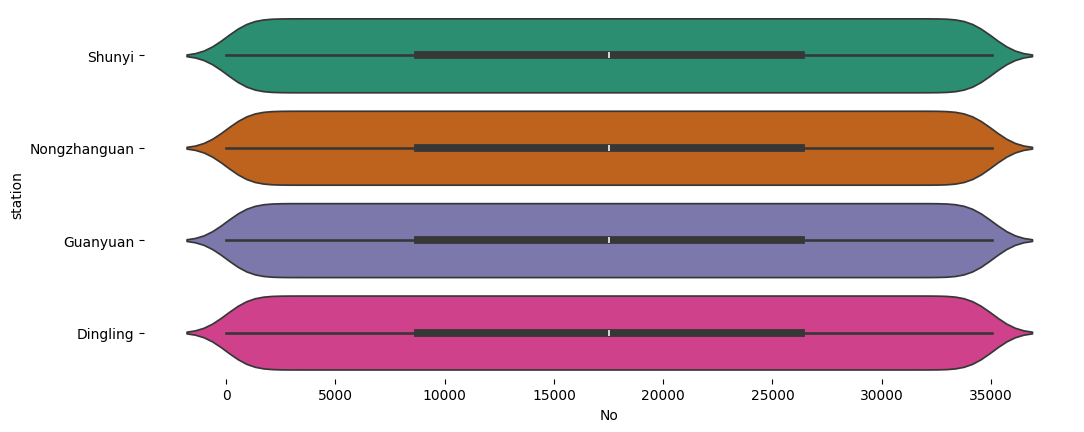

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['station'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='No', y='station', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

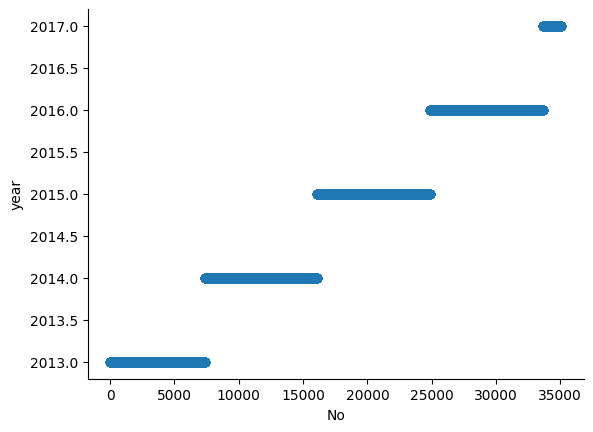

In [32]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='No', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)